# Práctica 8: Importación de datos desde archivos

En el ambiente de programación MATLAB es posible generar matrices y tablas de datos a partir de archivos en los formatos **.txt** y **.CSV**, este último formato se refiere a datos provenientes de un archivo de software de adquisición de datos o incluso de excell. El uso de archivos de datos funciona en sentido bidireccional, es decir, no solo es posible cargar los datos desde el archivo sino que tambien es posible crear un archivo de datos a partir de tablas generadas en MATLAB, como las tablas de conversiones de unidades analizadas en las prácticas anteriores. 

Una característica importante de los archivos de datos que se pueden manipular en MATLAB es el delimitador. Es importante que el archivo a leer separe los datos usando una coma, punto y coma o espacio, ademas de usar el tabulador para indicar el inicio de una nueva línea o renglón de datos, como se muestra en la {numref}`figura_datos`. Estas condiciones permiten la creación de una matriz en la que las columnas almacenan los datos de interés, importados desde el archivo de datos **.CSV** o **.txt**.


```{figure} /images/formato_datos.jpg
:height: 150px
:name: figura_datos
Formato de archivo de datos con delimitador **,**
```

Para hacer uso de los datos en un archivo es necesario cargarlos o importarlos al workspace de MATLAB, la importación de los datos se lleva a cabo usando la instrucción `load()`, el argumento de entrada es el nombre del archivo en el que se encuentran los datos.

## Importación de datos desde un archivo almacenado en el disco duro

El primer método para cargar datos es usando un archivo que se encuentra en la misma carpeta de trabajo en la que se encuentran los scripts o programas que se estan utilizando como se muestra en la {numref}`figura_carpeta`. 


```{figure} /images/carpeta_archivos.jpg
:height: 250px
:name: figura_carpeta
Ventana de usuarios que incluye al archivo de datos
```

Para poder cargar los datos del archivo y guardarlos en una variable tipo matriz o arreglo se usan las instrucciones:


In [1]:
datos=load('valores.txt')

datos = 6x2 double
         0    0.4500
    0.1000    0.7500
    0.2000    0.6500
    0.3000    0.8100
    0.4000    0.4800
    0.5000    0.7900

Si el archivo se encuentra fuera de la carpeta de trabajo se puede escribir la ubicación compelta del archivo para la importación de su contenido:

In [2]:
datos=load('C:\Users\fores\OneDrive\Documentos\Voltajes.txt')

datos = 5x2 double
         0         0
    0.0200    0.1000
    0.0400    0.1600
    0.0600    0.1930
    0.0800    0.4190

Una vez importados los datos, es posible manipular la matriz o arreglo que los contiene usando las funciones o comandos de MATLAB vistos en prácticas anteriores, por ejemplo, es posible extraer los datos de cada culumna y almacenarlos en vectores, extraer un rango de datos solamente, hacer transpuesta, etc. Los comandos para para realizar algunas operaciones estadísticas comunes se reportan en la {numref}`Tabla_estadistica`, donde:

* `mean(x)`, definido como $\bar{x}=\frac{\sum^{n}_{i=1}x_i}{n}$, donde: $\bar{x}$=promedio, $n=$total de datos.

* `std(x)`, definida como $\sigma=\sqrt{\frac{\sum^{n}_{i=1}(x_i-\bar{x})^2}{n}}$, donde: $\bar{x}$=promedio y $n=$total de datos.


```{list-table} Operaciones con conjuntos de datos.
:header-rows: 1
:name: Tabla_estadistica
* - Parámetro estadistico
  - Instrucción de MATLAB
* - Promedio 
  - `mean()`
* - Desviación estandar
  - `std()`
* - Máximo
  - `[renglon,columna]=max()`
* - Mínimo
  - `[renglon,columna]=min()`
```
Por ejemplo, el cálculo de los datos estadísticos del ejemplo anterior se obienen con las instrucciones:

In [3]:
disp('Valor promedio de la columna dos:')
mean(datos(:,2))
disp('Desviación estandar de la columna dos:')
std(datos(:,2))
disp('Valor mínimo de la columna dos:')
min(datos(:,2))
disp('Valor máximo de la columna dos:')
max(datos(:,2))

Valor promedio de la columna dos:


ans = 0.1744

Desviación estandar de la columna dos:


ans = 0.1552

Valor mínimo de la columna dos:


ans = 0

Valor máximo de la columna dos:


ans = 0.4190

Los datos importados se pueden graficar usando la instrucción `plot()`, de forma directa, o almacenando los valores en las columnas en arreglos unidimensionales como se muestra a continuación:

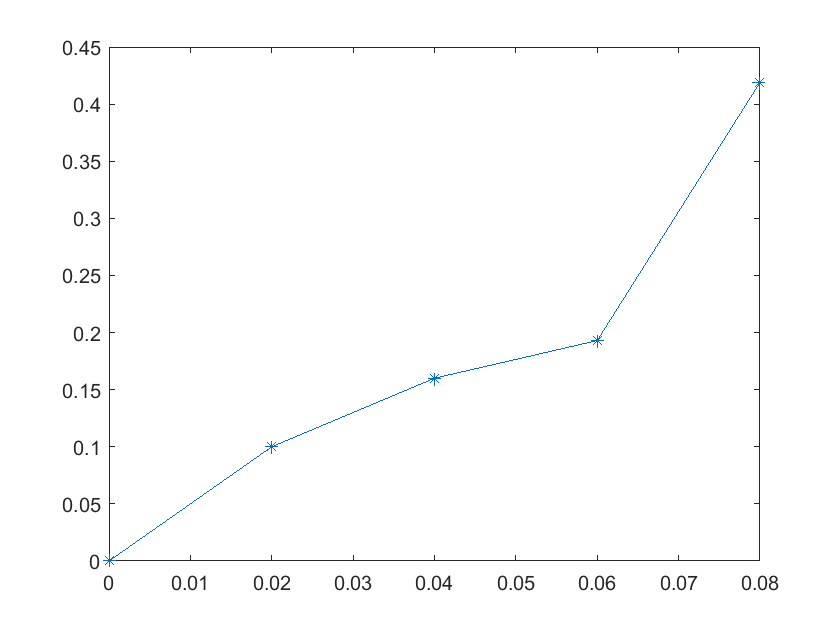

In [4]:
x=datos(:,1);
y=datos(:,2);
plot(x,y,'*-')% Gráfica de puntos, se especifica usando el caracter asterísco.

## Importación de datos desde un archivo disponible en internet

Es posible importar datos desde archivos disponibles en repositorios de internet usando MATLAB. Esta opción permite adquirir datos de diferentes orígenes y naturalezas, además de permitir almacenar información en la nube para utilizarla cuando sea necesario sin necesidad de almacenar grandes archivos en la computadora personal. GitHub es una excelente opción para almacenar ese tipo de archivos. El comando o función de MATLAB que permite importar los archivos es `readtable()`. El argumento que se escribe entre paréntesis, es la dirección de internet o repositorio en el que está almacenado el archivo. Para leer directamente de internet el archivo sin necesidad de almacenarlo en la computadora y leer únicamente los datos alacenados en el se usan las siguientes instrucciones:

In [5]:
clear 
close all
datos = readtable('https://raw.githubusercontent.com/LuisGerardo2204/Archivos_de_datos/main/ADC.txt');

Los datos han quedado almacenados en el la tabla con el mismo nombre. Una tabla de MATLAB es una variable epecial que se utiliza para almacenar los datos descargados de internet. Para convertir la variable tabla en un arreglo o matriz se usa el comando `table2array()`, para convertir los datos importados en el punto anterior se usa la siguiente instrucción: 

In [6]:
V = table2array(datos);

Los datos descargados del repositorio de internet se han convertido en una matriz o arreglo de tantas columnas como las que tiene la tabla de datos original, Estos datos se pueden procesar como los obtenidos de la importación de un archivo almacenado en el disco duro. Los datos importados en el punto anterior son formas de onda capturadas por un sistema de adquisición de datos, la primera columna corresponde al tiempo y las siguietes tres columnas corresponden a los valores instantáneos de voltaje de las tres formas de onda. Para graficar la forma de onda almacenada en la segunda columna se usan las instrucciones: 

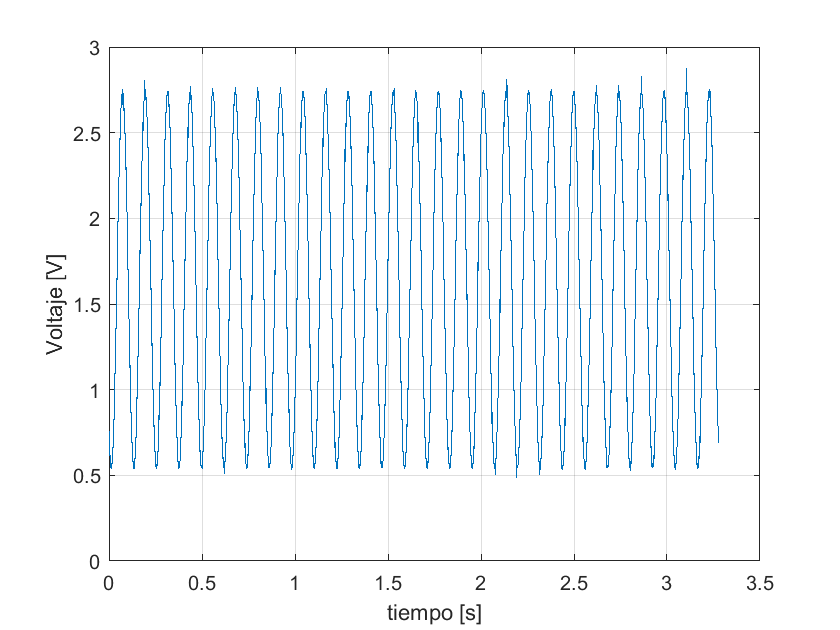

In [7]:
t=V(:,1);
v1=V(:,2);
plot(t,v1);
grid
ylabel('Voltaje [V]')
xlabel('tiempo [s]')

La segunda forma de onda se encuentra almacenada en la tercera columna, para graficarla se extrae del arreglo que contiene toda la información en forma condesada, para gráficar la segunda forma de onda se usan los comandos:

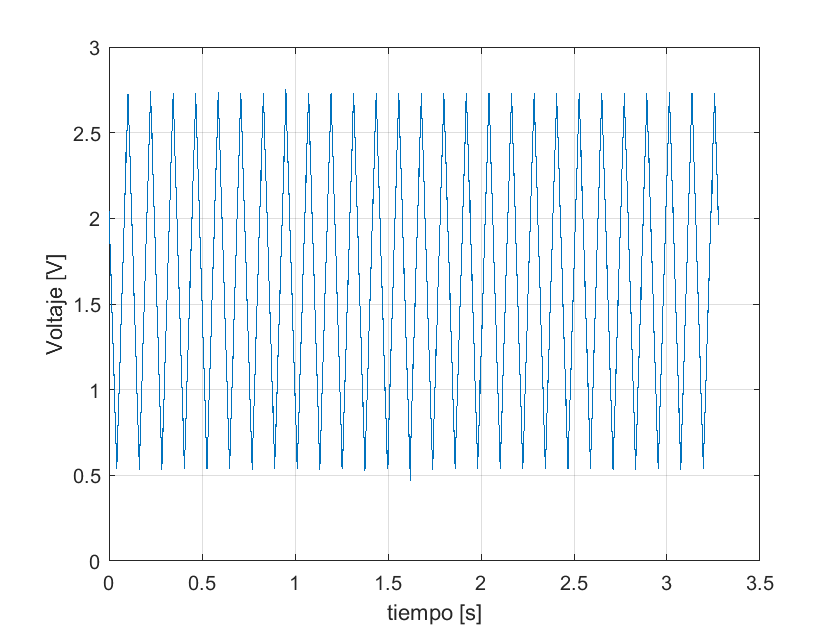

In [8]:
figure
t=V(:,1);
v2=V(:,3);
plot(t,v2);
ylabel('Voltaje [V]')
xlabel('tiempo [s]')
grid

Finalmente, la tercera forma de onda, almacenada en la tercera columna se obtiene extreayendo y graficando los valores correspondientes:

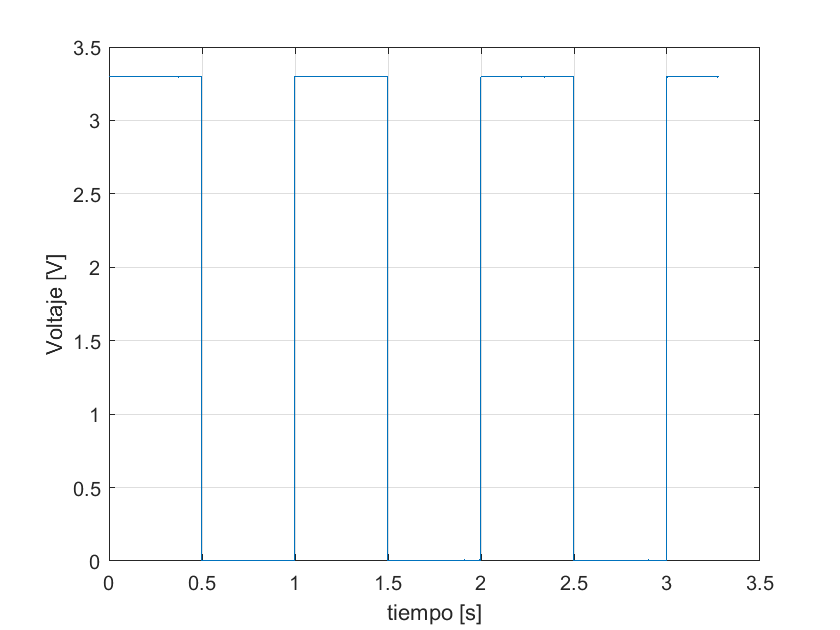

In [9]:
figure
t=V(:,1);
v3=V(:,4);
plot(t,v3);
grid
ylabel('Voltaje [V]')
xlabel('tiempo [s]')

Es posible graficar una subconjunto de datos en específico, extrayendo el subarreglo adecuado de los vectores de datos. Para graficar una porción de las tres formas de onda en una misma gráfica, en un intervalo de tiempo menor que el almacenado en el repositorio se usan las instrucciones siguientes:

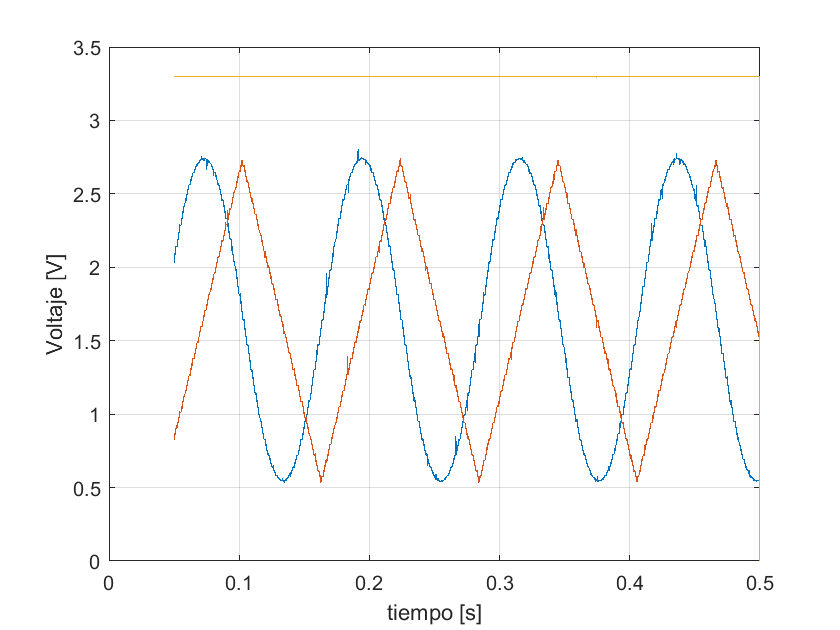

In [10]:
figure
t=V(1000:10000,1);
v1=V(1000:10000,2);
v2=V(1000:10000,3);
v3=V(1000:10000,4);
plot(t,v1);
hold on
plot(t,v2);
plot(t,v3);
ylabel('Voltaje [V]')
xlabel('tiempo [s]')
grid

Los datos estadísticos se pueden obtener de la misma manera que se hizo en el caso anterior:

In [11]:
disp("Valor promedio del voltaje uno")
mean(v1)
disp("Valor máximo del voltaje dos")
max(v2)

Valor promedio del voltaje uno


ans = 1.6800

Valor máximo del voltaje dos


ans = 2.7432

Una operación común en análisis de señales es la que consiste en centrar al rededor de cero las gráficas de los voltajes como función del tiempo. Este desplazamiento de las señales se logra restando el valor promedio de cada forma de onda, por ejemplo, para la forma de onda del voltaje dos se usan las siguientes instrucciones:

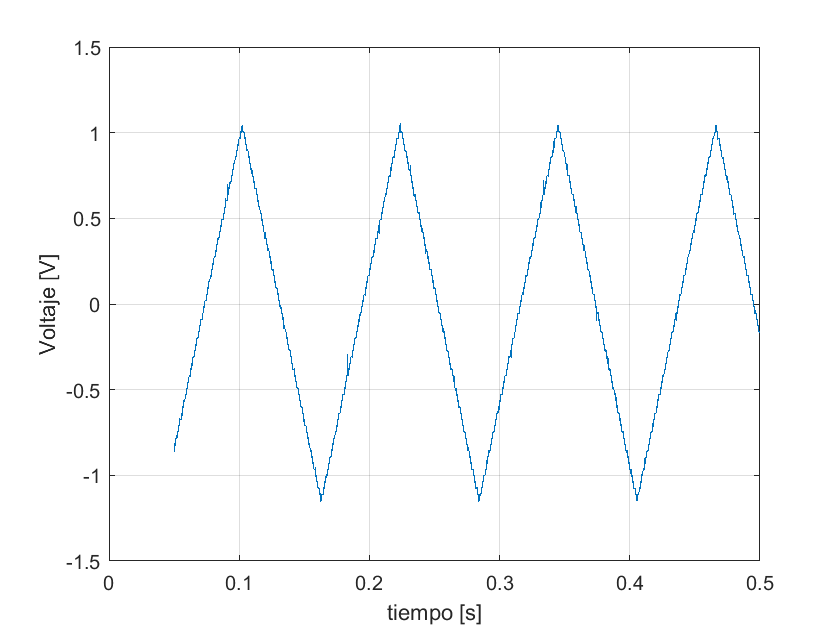

In [12]:
figure
v2=V(1000:10000,3)-mean(V(1000:10000,3));
plot(t,v2);
ylabel('Voltaje [V]')
xlabel('tiempo [s]')
grid

Se observa que la señal está centrada al rededor de cero Volts en vez de 1.68 Volts. 

En el caso de que sea conveniente guardar el archivo de datos en la computadora en la cual se está ejecutando MATLAB, es posible guardar el archivo de interés usando el comando o instrucción `websave()`, colocando entre paréntesis el nombre asignado al archivo que se almacenará en el disco duro local, seguido de la dirección en internet del archivo del cual se desea obtener la información. El proceso para guardar los datos de las formas de onda del ejemplo anterior se consigue usando los siguientes comandos de MATLAB:

In [13]:
clear
close all
nombre_archivo = 'Datos_web.txt';
websave(nombre_archivo,'https://raw.githubusercontent.com/LuisGerardo2204/Archivos_de_datos/main/ADC.txt');

La información contenida en el archivo que está disponible en el repositorio de GitHub se almacena en la carpeta de trabajo con el nombre 'Datos_web.txt', como se muestra en el video de abajo:

 <div align='center'>
<video controls autoplay muted="true" loop="true" width="800">
    <source src="./_static/videos/guarda_datos_web.mp4 " type="video/mp4">
</video>
</div>

Los datos almacenados en el archivo creado se pueden importar, procesar y/o graficar de la misma manera que se hace en el caso de los datos importados desde los archivos almacenados en el disco duro:

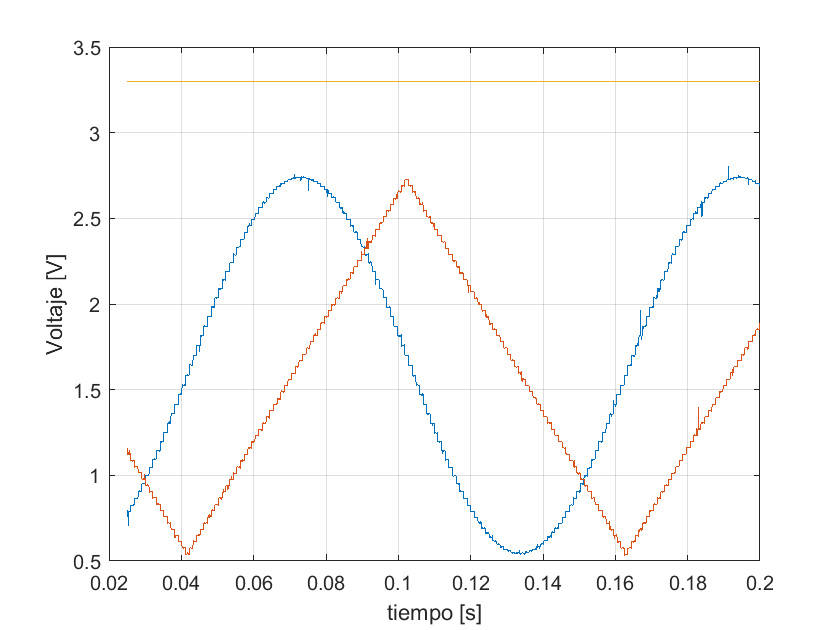

In [14]:
figure
V2=load('Datos_web.txt');
t=V2(500:4000,1);
v1=V2(500:4000,2);
v2=V2(500:4000,3);
v3=V2(500:4000,4);
plot(t,v1);
hold on
plot(t,v2);
plot(t,v3);
ylabel('Voltaje [V]')
xlabel('tiempo [s]')
grid

## Creación de archivos a partir de matrices o arreglos de datos

Es posible hacer el proceso inverso al que se ha ilustrado con anterioridad, es decir, en vez de importar los datos desde un archivo, se puede crear un archivo de datos usando MATLAB. El comando que se utiliza para tal fin es `fopen()`, con el nombre del archivo entre comillas, seguido de la palabra `wt` para indicar que será un archivo reescribible. Para ilustrar lo anterior usaremos la tabla de conversiones de centímetros a pulgadas y yardas de la práctica anterior:

In [15]:
clear
clc
cm=[1:1.5:33];
% Se crea el vector con las equivalencias o factores de conversión
% de centímetros a pulgadas pies y yardas.

conversion= [0.393701 0.0328084 0.0109361];

% Se crean los vectores que almacenan la conversión
[factor_conversion,longitud]=meshgrid(conversion,cm);

% En la matriz llamada equivalencias se almacenan las 
% conversiones, una vez que se aplica la multiplicación por el
% conjunto de factores correspondiente
equivalencias=(factor_conversion.*longitud);

% Tabla de conversión de centímetros a pulgadas, pies y yardas
tabla=[cm;equivalencias']; % Se agrupan los datos convertidos 
%en una matriz que será la tabla de datos

Para almacenar los datos en un archivo, en vez de desplegar la tabla en la ventana de comandos se usan las siguientes instrucciones:

In [16]:
% En vez de desplegar en pantalla la tabla, se crea un archivo con los datos 
% con el nombre "Tabla_de_longitudes.txt"
archivo= fopen('tabla_de_longitudes.txt', 'wt');
fprintf(archivo,"  Tabla de equivalencias de distancias \n");% Se usa el caracter especial "\n"
fprintf(archivo,"centímetros   pulgadas    pies    yardas \n");% para indicar cambio de línea
fprintf(archivo,"   %6.3f     %6.3f    %6.3f   %6.3f \n",tabla);
fclose(archivo);

El archivo con los datos tiene el nombre 'tabla_de_longitudes.txt' y se encuentra almacenado en la carpeta en la cual se está trabajando. Los datos almacenados en dicho archivo se pueden importar de la misma manera que se hace con los datos de la web o de archivos **.txt** provenientes de sistemas de aquisición de datos o señañles. 
Una práctica usual es omitir los encabezados, es decir el título y los rótulos de las columnas para poder acceder a la información almacenada, además, se incluye una coma para separar las columnas como se ilustra en los comandos siguientes:

In [17]:
archivo= fopen('tabla_datos.txt', 'wt');
fprintf(archivo,"%6.3f,%6.3f,%6.3f,%6.3f,\n",tabla);
fclose(archivo);

En el video de abajo se ilustra la creación de los dos tipos de archivos, uno con encabezados y un segundo sin ellos y usando comas como delimitador de columnas.

 <div align='center'>
<video controls autoplay muted="true" loop="true" width="600">
    <source src="./_static/videos/guarda_txt.mp4 " type="video/mp4">
</video>
</div>

## Ejercicio de la práctica 8

1. Genere un archivo con nombre **Tabla_de_barometro.txt** que contenga la tabla de alturas contra presión barométrica del ejercicio 7 de la práctica 7.

2. Importe el archivo **"tabla_temperaturas.txt"** desde internet usando el link:
   
 'https://raw.githubusercontent.com/LuisGerardo2204/Archivos_de_datos/main/tabla_temperaturas.txt' 
 
Guarde la información descargada en un archivo llamado **"Datos_temperatura.txt"**. El archivo **"Datos_temperatura.txt"** contiene los datos de temperatura de cinco sensores tomados en un intervalo de cero a 20 segundos, la primera columna del archivo contiene el instante de tiempo en el cual se registra la temperatura de los sensores uno al cinco (columnas dos a la seis).

3. Cargue los datos del archivo **"Datos_temperatura.txt"** en una matriz llamada $D$ y determine lo siguiente:

    a) Calcule la media y la desviación estándar para cada columna de temperaturas, omita el calculo de estos parámetros para        la columna uno, dado que la columna uno del arreglo con los datos (matriz $D$) tiene los valores de tiempo.

     b) Encuentre el valor máximo y mínimo de cada columna, usando las instrucciones `max()` y `min()`. Determine el tiempo           en el cual suceden esos valores máximos y mínimos de temperatura, sabiendo que el primer areglo entregado por el comando `[localidad,valor]=min(x)` almacena las  localidades en    las que ocurren dichos valores extremos.

     c) Convierta a grados Farenheit los datos de la tercera columna.

4. Importe el archivo **"aceleracion.txt"** desde internet que se encuentra en el link:

    'https://raw.githubusercontent.com/LuisGerardo2204/Archivos_de_datos/main/aceleracion.txt'

    Use el comando  `readtable()` para importar los datos y alacenarlos en una matriz $A_c$ y realice lo siguiente:

      a) Almacene los datos de cada columna en tres vectores $X$, $Y$ y $Z$.

      b) Multiplique los valores de cada uno de los tres vectores $X$, $Y$ y $Z$ por el factor de conversión        $3.3/4095$.

     c) Genere un vector `t=[0:1/2000:(1/2000)*(max(size(X))-1)]`, donde $X$ es el vector generado en el punto aterior.

     d) Grafique $X$ contra $t$ usando el comando `plot(t,X)`

     e) Guarde en un vector llamado $Zm$ los datos del vector $Z$ menos su promedio usando el comnado `mean()` Grafique el vector $Zm$ contra el vector de tiempo generado en el punto c), usando la instrucción `plot(t,Zm)`.



